In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

In [2]:
def generate_3d_data(m, w1=0.1, w2=0.3, noise=0.1):
    angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5
    data = np.empty((m, 3))
    data[:, 0] = np.cos(angles) + np.sin(angles) / 2 + noise * np.random.randn(m) / 2
    data[:, 1] = np.sin(angles) * 0.7 + noise * np.random.randn(m) / 2
    data[:, 2] = data[:, 0] * w1 + data[:, 1] * w2 + noise * np.random.randn(m)
    return data

In [3]:
np.random.seed(4)

x_train = generate_3d_data(60)
x_train = x_train - x_train.mean(axis=0, keepdims=0)

In [4]:
np.random.seed(42)
tf.random.set_seed(42)

encoder = keras.models.Sequential([keras.layers.Dense(2, input_shape=[3])])
decoder = keras.models.Sequential([keras.layers.Dense(3, input_shape=[2])])
autoencoder = keras.models.Sequential([encoder, decoder])

autoencoder.compile(loss='mse', optimizer=keras.optimizers.SGD(learning_rate=1.5))

In [5]:
history = autoencoder.fit(x_train, x_train, epochs=20)

Epoch 1/20
2/2 [==============================] - 0s 2ms/step - loss: 0.2547
Epoch 2/20
2/2 [==============================] - 0s 2ms/step - loss: 0.1032
Epoch 3/20
2/2 [==============================] - 0s 3ms/step - loss: 0.0551
Epoch 4/20
2/2 [==============================] - 0s 4ms/step - loss: 0.0503
Epoch 5/20
2/2 [==============================] - 0s 3ms/step - loss: 0.0839
Epoch 6/20
2/2 [==============================] - 0s 3ms/step - loss: 0.2223
Epoch 7/20
2/2 [==============================] - 0s 3ms/step - loss: 0.0913
Epoch 8/20
2/2 [==============================] - 0s 3ms/step - loss: 0.0320
Epoch 9/20
2/2 [==============================] - 0s 5ms/step - loss: 0.0242
Epoch 10/20
2/2 [==============================] - 0s 4ms/step - loss: 0.0189
Epoch 11/20
2/2 [==============================] - 0s 3ms/step - loss: 0.0142
Epoch 12/20
2/2 [==============================] - 0s 3ms/step - loss: 0.0102
Epoch 13/20
2/2 [==============================] - 0s 3ms/step - loss: 0.

In [6]:
codings = encoder.predict(x_train)

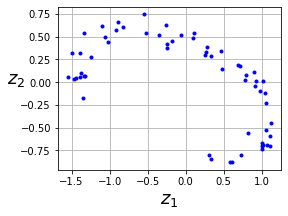

In [7]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=[4, 3])
plt.plot(codings[:, 0], codings[:, 1], 'b.')
plt.xlabel('$z_1$', fontsize=18)
plt.ylabel('$z_2$', fontsize=18, rotation=0)
plt.grid(True)
plt.show()

In [8]:
(x_train_full, y_train_full), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()
x_train_full = x_train_full.astype(np.float32) / 255
x_test = x_test.astype(np.float32) / 255
x_train, x_valid = x_train_full[:-5000], x_train_full[-5000:]
y_train, y_valid = y_train_full[:-5000], y_train_full[-5000:]

In [9]:
def rounded_accuracy(y_true, y_pred):
    return keras.metrics.binary_accuracy(tf.round(y_true), tf.round(y_pred))

In [10]:
np.random.seed(42)
tf.random.set_seed(42)

stacked_encoder = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(100, activation='selu'),
    keras.layers.Dense(30, activation='selu'),
])

stacked_decoder = keras.models.Sequential([
    keras.layers.Dense(100, activation='selu', input_shape=[30]),
    keras.layers.Dense(28 * 28, activation='sigmoid'),
    keras.layers.Reshape([28, 28])
])

stacked_ae = keras.models.Sequential([stacked_encoder, stacked_decoder])

stacked_ae.compile(loss='binary_crossentropy', 
                   optimizer=keras.optimizers.SGD(learning_rate=1.5), 
                   metrics=[rounded_accuracy])

In [11]:
history = stacked_ae.fit(x_train, x_train, epochs=20, 
                         validation_data=(x_valid, x_valid))

Epoch 1/20
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3381 - rounded_accuracy: 0.8870 - val_loss: 0.3173 - val_rounded_accuracy: 0.8989
Epoch 2/20
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3056 - rounded_accuracy: 0.9151 - val_loss: 0.3020 - val_rounded_accuracy: 0.9198
Epoch 3/20
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2986 - rounded_accuracy: 0.9215 - val_loss: 0.2983 - val_rounded_accuracy: 0.9203
Epoch 4/20
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2948 - rounded_accuracy: 0.9249 - val_loss: 0.2938 - val_rounded_accuracy: 0.9285
Epoch 5/20
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2923 - rounded_accuracy: 0.9272 - val_loss: 0.2919 - val_rounded_accuracy: 0.9284
Epoch 6/20
1719/1719 [==============================] - 6s 4ms/step - loss: 0.2904 - rounded_accuracy: 0.9289 - val_loss: 0.2914 - val_rounded_accuracy: 0.9306
Epoch 7/20
1719/1719 [==================

In [12]:
def plot_image(image):
    plt.imshow(image, cmap='binary')
    plt.axis('off')
    
    
def show_reconstructions(model, images=x_valid, n_images=5):
    reconstructions = model.predict(images[:n_images])
    fig = plt.figure(figsize=(n_images * 1.5, 3))
    for image_index in range(n_images):
        plt.subplot(2, n_images, 1 + image_index)
        plot_image(images[image_index])
        plt.subplot(2, n_images, 1 + n_images + image_index)
        plot_image(reconstructions[image_index])

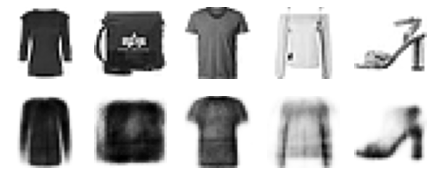

In [13]:
show_reconstructions(stacked_ae)

In [14]:
from sklearn.manifold import TSNE

np.random.seed(42)

x_valid_compressed = stacked_encoder.predict(x_valid)
tsne = TSNE()
x_valid_2d = tsne.fit_transform(x_valid_compressed)
x_valid_2d = (x_valid_2d - x_valid_2d.min()) / (x_valid_2d.max() - x_valid_2d.min())

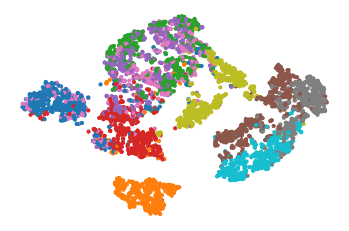

In [15]:
plt.scatter(x_valid_2d[:, 0], x_valid_2d[:, 1], c=y_valid, s=10, cmap='tab10')
plt.axis('off')
plt.show()

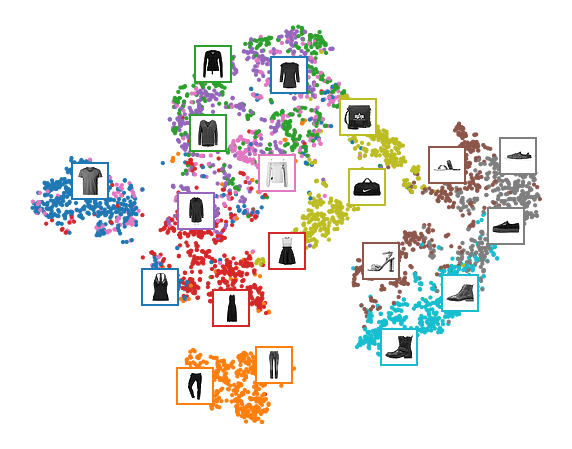

In [16]:
import matplotlib as mpl

plt.figure(figsize=(10, 8))
cmap = plt.cm.tab10
plt.scatter(x_valid_2d[:, 0], x_valid_2d[:, 1], c=y_valid, s=10, cmap=cmap)
image_positions = np.array([[1., 1.]])
for index, position in enumerate(x_valid_2d):
    dist = np.sum((position - image_positions) ** 2, axis=1)
    if np.min(dist) > 0.02:
        image_positions = np.r_[image_positions, [position]]
        imagebox = mpl.offsetbox.AnnotationBbox(
            mpl.offsetbox.OffsetImage(x_valid[index], cmap='binary'),
            position,
            bboxprops={'edgecolor': cmap(y_valid[index]), 'lw': 2})
        plt.gca().add_artist(imagebox)
plt.axis('off')
plt.show()         